In [1]:
import sqlite3

In [41]:
conn = sqlite3.connect('./test.db')
cursor = conn.cursor()

# Ejecutar la consulta SELECT *
cursor.execute("SELECT * FROM resultado_imagen")

# Obtener los resultados de la consulta
resultados = cursor.fetchall()
print(resultados)

# Recorrer los resultados e imprimir los valores
print(resultados[1][3])
for indice,recorrido in enumerate(resultados):
    if (resultados[indice][3]=="2023-05-23 14:52:58.694936"):
        print(resultados[indice][0])
# Cerrar la conexión
conn.close()

[(1, '[199, 1240]', '[289, 1299]', '[10.7999463]', '[-74.20335997]', 0.9248143434524536, 2), (2, '[221, 647]', '[306, 729]', '[10.8000284]', '[-74.20335729]', 0.6331658363342285, 2), (3, '[6, 1116]', '[64, 1210]', '[10.79996125]', '[-74.20338946]', 0.19952894747257233, 2), (4, '[417, 65]', '[505, 128]', '[10.80011177]', '[-74.20332936]', 0.16567888855934143, 2), (5, '[339, 977]', '[394, 1035]', '[10.80003789]', '[-74.20335423]', 0.998923122882843, 3), (6, '[362, 1142]', '[438, 1243]', '[10.80001163]', '[-74.20334958]', 0.9954277276992798, 3), (7, '[829, 76]', '[919, 135]', '[10.80016507]', '[-74.20328267]', 0.9758849143981934, 3), (8, '[373, 1096]', '[453, 1140]', '[10.80002222]', '[-74.2033476]', 0.9313584566116332, 3), (9, '[844, 1202]', '[887, 1279]', '[10.80000485]', '[-74.20328379]', 0.5765292644500732, 3), (10, '[566, 1200]', '[589, 1237]', '[10.80000796]', '[-74.20332445]', 0.5140727162361145, 3), (11, '[630, 611]', '[666, 686]', '[10.80008842]', '[-74.20331443]', 0.438632488250

In [65]:
conn = sqlite3.connect('./test.db')
cursor = conn.cursor()

# Ejecutar la consulta SELECT *
cursor.execute("SELECT * FROM registro_carpeta")

# Obtener los resultados de la consulta
resultados = cursor.fetchall()

# Recorrer los resultados e imprimir los valores
for fila in resultados:
    for valor in fila:
        print(valor)
    print()

# Cerrar la conexión
conn.close()

1
7
D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN
2023-05-29 10:13:53.054270

2
7
D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN
2023-05-29 11:03:10.822975



In [20]:
import sqlite3

# Conectar a la base de datos
conexion = sqlite3.connect('./test.db')
cursor = conexion.cursor()

# Definir los valores de nombre_imagen y id_registro_carpeta
nombre_imagen = "DJI_0050.JPG"
id_registro_carpeta = 8

# Consultar el id de la fila con nombre_imagen y id_registro_carpeta especificados
cursor.execute("SELECT id FROM tabla_imagenes WHERE nombre_imagen = ? AND id_registro_carpeta = ?", (nombre_imagen, id_registro_carpeta))
resultado = cursor.fetchone()

if resultado is not None:
    id_fila = resultado[0]
    print(f"El id de la fila con nombre_imagen '{nombre_imagen}' y id_registro_carpeta {id_registro_carpeta} es: {id_fila}")
else:
    print("No se encontró ninguna fila con los criterios especificados")

# Cerrar la conexión
conexion.close()

No se encontró ninguna fila con los criterios especificados


In [21]:
import sqlite3

# Establecer la conexión a la base de datos
conexion = sqlite3.connect('test.db')
cursor = conexion.cursor()

# Nombre a buscar
nombre = "D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN"

# Ejecutar la consulta
cursor.execute("SELECT id FROM registro_carpeta WHERE ruta_carpeta = ?", (nombre,))
row = cursor.fetchone()

if row is not None:
    id_encontrado = row[0]
    print(f"ID encontrado: {id_encontrado}")
else:
    print("No se encontró ningún ID para el nombre especificado")

# Cerrar la conexión
conexion.close()

ID encontrado: 1


In [11]:
import sqlite3

# Establecer la conexión a la base de datos
conexion = sqlite3.connect('test.db')
conexion.execute("PRAGMA foreign_keys = 1")

id_tabla1 = 3  # ID del registro de tabla1

cursor = conexion.cursor()
cursor.execute("SELECT * FROM tabla_imagenes WHERE id_tabla1 = ?", (id_tabla1,))
rows = cursor.fetchall()

for row in rows:
    # Acceder a los valores de cada columna
    id_tabla2 = row[0]
    columna1 = row[1]
    columna2 = row[2]
    
    # Realizar las operaciones deseadas con los datos de la fila
    print(f"ID tabla2: {id_tabla2}, Columna 1: {columna1}, Columna 2: {columna2}")

OperationalError: no such column: id_tabla1

In [24]:
import sqlite3

# Establecer la conexión a la base de datos
conexion = sqlite3.connect('test.db')
cursor = conexion.cursor()

# Nombre de la imagen y ruta a buscar
nombre_imagen = 'DJI_0020.JPG'
ruta = 'D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN'

# Ejecutar la consulta
cursor.execute("SELECT * FROM tabla_imagenes AS ti JOIN resultado_imagen AS ri ON ti.id = ri.id_tabla_imagenes WHERE ti.nombre_imagen = ? AND ti.id_registro_carpeta IN (SELECT id FROM registro_carpeta WHERE ruta_carpeta = ?)", (nombre_imagen, ruta))
rows = cursor.fetchall()
print(len(rows))
# Recorrer y mostrar los resultados
for row in rows:
    # Acceder a los valores de las columnas
    id_tabla_imagenes = row[0]
    # ...
    # Acceder a los valores de las columnas de resultado_imagen
    pixel_min = row[5]
    pixel_max = row[6]
    latitud = row[7]
    longitud = row[8]
    score = row[9]
    print(f"{pixel_max} - {pixel_min} - {latitud} - {longitud} - {score}")

    # Hacer algo con los valores obtenidos

# Cerrar la conexión
conexion.close()

4
[289, 1299] - [199, 1240] - [10.7999463] - [-74.20335997] - 0.9248143434524536
[306, 729] - [221, 647] - [10.8000284] - [-74.20335729] - 0.6331658363342285
[64, 1210] - [6, 1116] - [10.79996125] - [-74.20338946] - 0.19952894747257233
[505, 128] - [417, 65] - [10.80011177] - [-74.20332936] - 0.16567888855934143


In [31]:
pixel_min

'[417, 65]'

In [32]:
pixel_max

'[505, 128]'

In [33]:
# Eliminar los corchetes y dividir la cadena en números separados
numbers = pixel_min.strip('[]').split(',')

# Convertir los números de cadena a enteros
num1 = int(numbers[0])
num2 = int(numbers[1])

print(num1)  # Output: 417
print(num2)  # Output: 65

417
65


In [34]:
score

0.16567888855934143

In [39]:
lista_dic =[]
conexion = sqlite3.connect('./test.db')  # Reemplaza con el nombre de tu base de datos
cursor = conexion.cursor()
ruta_carpeta="D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN"
    # Consulta SQL para obtener los nombres de las imágenes y la cantidad de detecciones
consulta = '''
        SELECT i.nombre_imagen, i.cantidad_detect
        FROM tabla_imagenes AS i
        INNER JOIN registro_carpeta AS rc ON i.id_registro_carpeta = rc.id
        WHERE rc.ruta_carpeta = ?
    '''

    # Ejecutar la consulta y obtener los resultados
cursor.execute(consulta, (ruta_carpeta,))
resultados = cursor.fetchall()
conexion.close()

    # Recorrer los resultados e imprimir los nombres de las imágenes y la cantidad de detecciones
for nombre_imagen, cantidad_detect in resultados:
        #print(f'Imagen: {nombre_imagen}, Detecciones: {cantidad_detect}')
        diccionario = {"nombre": nombre_imagen, "n_detection": cantidad_detect}
        lista_dic.append(diccionario)
    # Cerrar la conexión


print(lista_dic)

Imagen: DJI_0010.JPG, Detecciones: 0
Imagen: DJI_0020.JPG, Detecciones: 4
Imagen: DJI_0030.JPG, Detecciones: 10
Imagen: DJI_0040.JPG, Detecciones: 21
Imagen: DJI_0050.JPG, Detecciones: 2
Imagen: DJI_0060.JPG, Detecciones: 5
Imagen: DJI_0070.JPG, Detecciones: 10
[{'nombre': 'DJI_0010.JPG', 'n_detection': 0}, {'nombre': 'DJI_0020.JPG', 'n_detection': 4}, {'nombre': 'DJI_0030.JPG', 'n_detection': 10}, {'nombre': 'DJI_0040.JPG', 'n_detection': 21}, {'nombre': 'DJI_0050.JPG', 'n_detection': 2}, {'nombre': 'DJI_0060.JPG', 'n_detection': 5}, {'nombre': 'DJI_0070.JPG', 'n_detection': 10}]


In [40]:
for indice,imagenes in enumerate(lista_dic):
    print(indice)
    print(imagenes)

0
{'nombre': 'DJI_0010.JPG', 'n_detection': 0}
1
{'nombre': 'DJI_0020.JPG', 'n_detection': 4}
2
{'nombre': 'DJI_0030.JPG', 'n_detection': 10}
3
{'nombre': 'DJI_0040.JPG', 'n_detection': 21}
4
{'nombre': 'DJI_0050.JPG', 'n_detection': 2}
5
{'nombre': 'DJI_0060.JPG', 'n_detection': 5}
6
{'nombre': 'DJI_0070.JPG', 'n_detection': 10}


In [53]:
import sqlite3

# Conectar a la base de datos
conexion = sqlite3.connect('test.db')  # Reemplaza con el nombre de tu base de datos
cursor = conexion.cursor()

# Definir los valores para nombre_imagen y ruta_carpeta
nombre_imagen = 'DJI_0050.JPG'  # Reemplaza con el nombre de la imagen deseada
ruta_carpeta = 'D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN'  # Reemplaza con la ruta de la carpeta deseada

# Consulta SQL para obtener los datos de resultado_imagen relacionados con nombre_imagen y ruta_carpeta
consulta = '''
    SELECT ri.*
    FROM resultado_imagen AS ri
    INNER JOIN tabla_imagenes AS ti ON ri.id_tabla_imagenes = ti.id
    INNER JOIN registro_carpeta AS rc ON ti.id_registro_carpeta = rc.id
    WHERE ti.nombre_imagen = ? AND rc.ruta_carpeta = ?
'''

# Ejecutar la consulta y obtener los resultados
cursor.execute(consulta, (nombre_imagen, ruta_carpeta))
resultados = cursor.fetchall()
conexion.close()
lista_dic=[]
# Recorrer los resultados y procesar los datos
for resultado in resultados:
    # Acceder a los campos de la tabla resultado_imagen
    id_resultado = resultado[0]
    pixel_min = resultado[1]
    pixel_max = resultado[2]
    latitud = resultado[3]
    longitud = resultado[4]
    score = resultado[5]
    id_tabla_imagenes = resultado[6]
    # Hacer algo con los datos...
    diccionario = {"pixel_min": pixel_min, "pixel_max": pixel_max, "lat":latitud,"long":longitud}
    lista_dic.append(diccionario)

# Cerrar la conexión


In [54]:
lista_dic

[{'pixel_min': '[210, 1230]',
  'pixel_max': '[289, 1299]',
  'lat': '[10.79981858]',
  'long': '[-74.20346682]'},
 {'pixel_min': '[275, 1014]',
  'pixel_max': '[311, 1054]',
  'lat': '[10.79985113]',
  'long': '[-74.20346059]'}]

In [55]:
len([])

0

In [61]:
def obtener_resultados_por_ruta_carpeta(ruta_carpeta):
    conexion = sqlite3.connect("test.db")  # Reemplaza con el nombre de tu base de datos
    cursor = conexion.cursor()

    # Realizar la consulta utilizando JOIN para combinar las tablas
    consulta = '''SELECT r.*
                  FROM resultado_imagen r
                  INNER JOIN tabla_imagenes t ON r.id_tabla_imagenes = t.id
                  INNER JOIN registro_carpeta rc ON t.id_registro_carpeta = rc.id
                  WHERE rc.ruta_carpeta = ?'''
    
    cursor.execute(consulta, (ruta_carpeta,))
    resultados = cursor.fetchall()

    conexion.close()

    return resultados

# Ejemplo de uso
ruta_carpeta = "D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN"
resultados = obtener_resultados_por_ruta_carpeta(ruta_carpeta)

# Recorrer los resultados obtenidos
for resultado in resultados:
    # Procesar cada fila de resultado
    print(resultado)

In [60]:
len(resultados)

0

In [73]:
fecha="2023-05-29 11:03:10.822975"
conexion = sqlite3.connect('./test.db')  # Reemplaza con el nombre de tu base de datos

# Crear un cursor
cursor = conexion.cursor()

# Ejecutar la consulta
cursor.execute("""
    SELECT tabla_imagenes.cantidad_detect, tabla_imagenes.nombre_imagen
    FROM tabla_imagenes
    JOIN registro_carpeta ON tabla_imagenes.id_registro_carpeta = registro_carpeta.id
    WHERE registro_carpeta.fecha = ?
    """, (fecha,))


# Obtener los resultados de la consulta
resultados = cursor.fetchall()

# Cerrar la conexión con la base de datos
conexion.close()

    # Devolver los resultados



In [74]:
resultados

[(0, 'DJI_0010.JPG'),
 (4, 'DJI_0020.JPG'),
 (10, 'DJI_0030.JPG'),
 (21, 'DJI_0040.JPG'),
 (2, 'DJI_0050.JPG'),
 (5, 'DJI_0060.JPG'),
 (10, 'DJI_0070.JPG')]

In [75]:
resultados

[(0, 'DJI_0010.JPG'),
 (4, 'DJI_0020.JPG'),
 (10, 'DJI_0030.JPG'),
 (21, 'DJI_0040.JPG'),
 (2, 'DJI_0050.JPG'),
 (5, 'DJI_0060.JPG'),
 (10, 'DJI_0070.JPG')]

In [78]:
import matplotlib.pyplot as plt

In [83]:
valores = [dato[0] for dato in resultados]
etiquetas = ['= 0', '> 0']

# Colores para los sectores
colores = ['#ff9999', '#66b3ff']

    # Crear una lista de valores con dos elementos: uno para los valores iguales a cero y otro para los mayores que cero
valores_grafica = [sum(valores == 0), sum(valores > 0)]

    # Crear la figura y los ejes de la gráfica
fig, ax = plt.subplots()

    # Crear la gráfica de torta
ax.pie(valores_grafica, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

    # Agregar título a la gráfica
ax.set_title('Distribución de valores = 0 y > 0')

    # Mostrar la gráfica
plt.show()

TypeError: 'bool' object is not iterable

In [104]:
valores = [dato[0] for dato in resultados]
etiquetas = ['Not Sigatoka', 'Sigatoka']

[0, 4, 10, 21, 2, 5, 10]

In [100]:
comparar_cero = lambda valor: valor == 0
cantidad_ceros = len(list(filter(comparar_cero, valores)))

In [101]:
cantidad_ceros

1

In [102]:
comparar_ncero = lambda valor: valor > 0
cantidad_nceros = len(list(filter(comparar_ncero, valores)))

In [103]:
cantidad_nceros

6

In [105]:
v_g=[cantidad_ceros,cantidad_nceros]

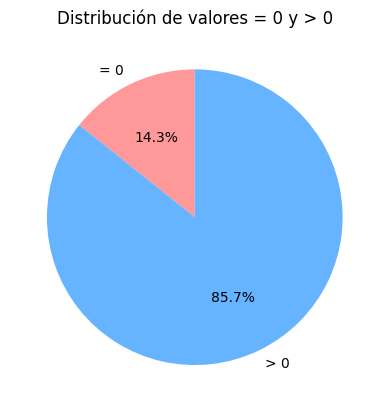

In [106]:
fig, ax = plt.subplots()

    # Crear la gráfica de torta
ax.pie(v_g, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

    # Agregar título a la gráfica
ax.set_title('Areas with Sigatoka')

    # Mostrar la gráfica
plt.show()
